In [1]:
import numpy as np
import sklearn
import pandas as pd
df1=pd.read_csv("C:/Users/Satyabrat Behera/Downloads/mushroom_train.csv")
df1.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,weight,ring-number,ring-type,spore-print-color,population,habitat
0,p,f,s,e,f,s,f,c,n,b,...,p,w,p,w,38,o,e,w,v,l
1,p,x,y,w,t,p,f,c,n,k,...,w,w,p,w,43,o,p,n,v,u
2,e,f,s,n,t,n,f,c,b,e,...,e,e,p,w,37,t,e,w,c,w
3,p,x,s,e,f,y,f,c,n,b,...,p,w,p,w,82,o,e,w,v,l
4,e,x,s,w,t,l,f,c,b,n,...,w,w,p,w,36,o,p,n,s,m


In [2]:
df1.isnull().sum()#no null should be present

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
radius                      0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
weight                      0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [3]:
df1['class'].unique()#to see no. of unique elements

array(['p', 'e'], dtype=object)

In [4]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for col in df1.columns:
    df1[col] = labelencoder.fit_transform(df1[col])
df1.head()#unique

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,weight,ring-number,ring-type,spore-print-color,population,habitat
0,1,2,2,2,0,7,1,0,1,0,...,6,7,0,2,26,1,0,7,4,2
1,1,5,3,8,1,6,1,0,1,4,...,7,7,0,2,31,1,4,3,4,5
2,0,2,2,4,1,5,1,0,0,1,...,2,2,0,2,25,2,0,7,1,6
3,1,5,2,2,0,8,1,0,1,0,...,6,7,0,2,69,1,0,7,4,2
4,0,5,2,8,1,3,1,0,0,5,...,7,7,0,2,24,1,4,3,3,3


In [5]:
for feature,col_data in df1.iteritems():
    if col_data.dtype == object:
        print("{} has {}".format(feature,col_data.unique()))

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
X = df1.iloc[:,1:24]  # all rows, all the features and no labels
y = df1.iloc[:, 0]  # all rows, label only
X.drop('veil-type',axis=1)
df1=df1.drop('veil-type',axis=1)
X.shape

(5686, 23)

In [8]:
corr_mat=df1.corr()

In [9]:
corr_mat#finding correlation of each element with the other one.

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,weight,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.042155,0.176899,-0.018315,-0.502157,-0.091765,0.119715,-0.348396,0.539296,-0.531714,...,-0.303188,-0.141789,-0.140983,0.139915,0.006377,-0.217923,-0.413472,0.164303,0.292035,0.216358
cap-shape,0.042155,1.000000,-0.050507,-0.049525,-0.028575,-0.021651,0.073417,-0.001366,0.046013,-0.006245,...,-0.031333,-0.035038,-0.029181,0.064026,0.015683,-0.123694,-0.026889,-0.084278,0.070923,-0.042490
cap-surface,0.176899,-0.050507,1.000000,-0.023641,0.066776,0.051636,-0.033450,-0.274616,0.207781,-0.167356,...,0.099681,0.070571,0.063991,-0.013444,-0.009219,-0.023283,-0.113144,0.231465,0.012944,0.158039
cap-color,-0.018315,-0.049525,-0.023641,1.000000,-0.011004,-0.384536,0.041425,0.149580,-0.164310,0.079571,...,-0.061882,-0.000779,-0.004182,0.037910,0.004976,0.000711,0.153141,-0.284759,-0.153048,0.038552
bruises,-0.502157,-0.028575,0.066776,-0.011004,1.000000,-0.055836,0.132196,-0.299498,-0.365449,0.526684,...,0.459844,0.071998,0.088409,0.113148,-0.010752,0.049784,0.693615,-0.284631,0.082524,-0.078090
odor,-0.091765,-0.021651,0.051636,-0.384536,-0.055836,1.000000,-0.054703,0.065724,0.319945,-0.128353,...,0.074021,0.175100,0.178315,-0.052985,0.009302,0.112166,-0.277452,0.473380,-0.047982,-0.033562
gill-attachment,0.119715,0.073417,-0.033450,0.041425,0.132196,-0.054703,1.000000,0.068124,0.103890,-0.124812,...,-0.112935,0.097695,0.093831,0.894226,0.015686,0.095721,-0.138358,-0.029423,0.169458,-0.027452
gill-spacing,-0.348396,-0.001366,-0.274616,0.149580,-0.299498,0.065724,0.068124,1.000000,-0.105925,0.103402,...,-0.205091,0.276282,0.253343,0.074113,0.002786,0.251853,-0.189465,0.060826,-0.527422,-0.149350
gill-size,0.539296,0.046013,0.207781,-0.164310,-0.365449,0.319945,0.103890,-0.105925,1.000000,-0.515428,...,0.013449,0.300321,0.284636,0.101500,0.017124,-0.175917,-0.460385,0.619809,0.136891,0.160517
gill-color,-0.531714,-0.006245,-0.167356,0.079571,0.526684,-0.128353,-0.124812,0.103402,-0.515428,1.000000,...,0.261116,-0.064780,-0.080552,-0.092610,-0.006001,0.097492,0.624766,-0.408625,-0.033504,-0.206406


In [10]:
%matplotlib inline
corr_mat1=np.array(corr_mat)
corr_mat1

array([[  1.00000000e+00,   4.21546225e-02,   1.76899229e-01,
         -1.83145162e-02,  -5.02157415e-01,  -9.17645219e-02,
          1.19715474e-01,  -3.48395503e-01,   5.39296222e-01,
         -5.31714322e-01,  -1.10220608e-01,  -3.69834496e-01,
          8.60361057e-02,  -3.39820942e-01,  -3.03188226e-01,
         -1.41788963e-01,  -1.40982892e-01,   1.39915221e-01,
          6.37666324e-03,  -2.17923275e-01,  -4.13472100e-01,
          1.64303345e-01,   2.92035105e-01,   2.16357830e-01],
       [  4.21546225e-02,   1.00000000e+00,  -5.05069748e-02,
         -4.95246574e-02,  -2.85752038e-02,  -2.16509552e-02,
          7.34168430e-02,  -1.36639650e-03,   4.60129878e-02,
         -6.24495389e-03,   6.54083162e-02,   4.14494778e-02,
         -3.65996924e-02,  -2.97555761e-02,  -3.13332609e-02,
         -3.50378227e-02,  -2.91809571e-02,   6.40258929e-02,
          1.56826868e-02,  -1.23693776e-01,  -2.68887552e-02,
         -8.42779667e-02,   7.09233063e-02,  -4.24898207e-02],
      

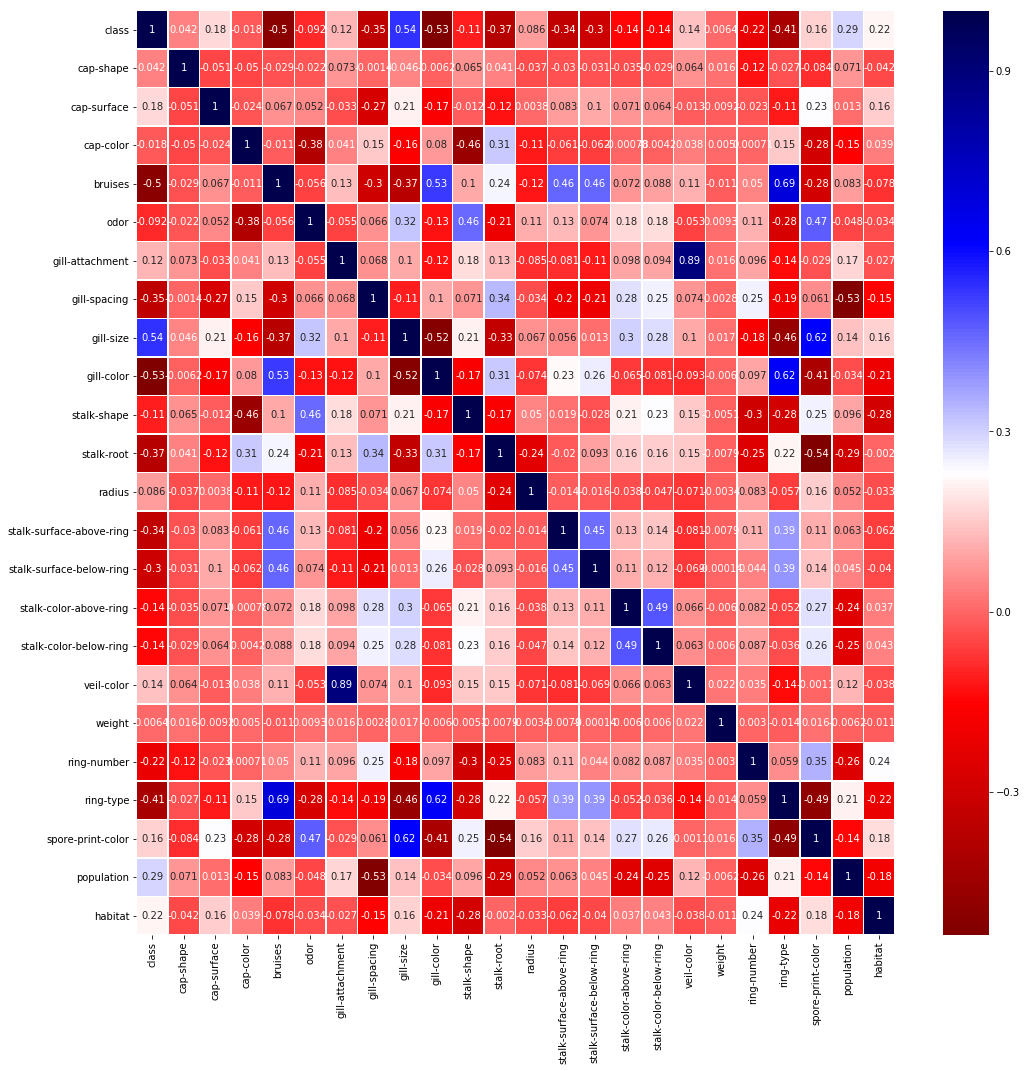

In [11]:
f, ax = plt.subplots(figsize=(17,17))
ax=sns.heatmap(corr_mat,annot=True,cmap='seismic_r',ax=ax,linewidths=.5)

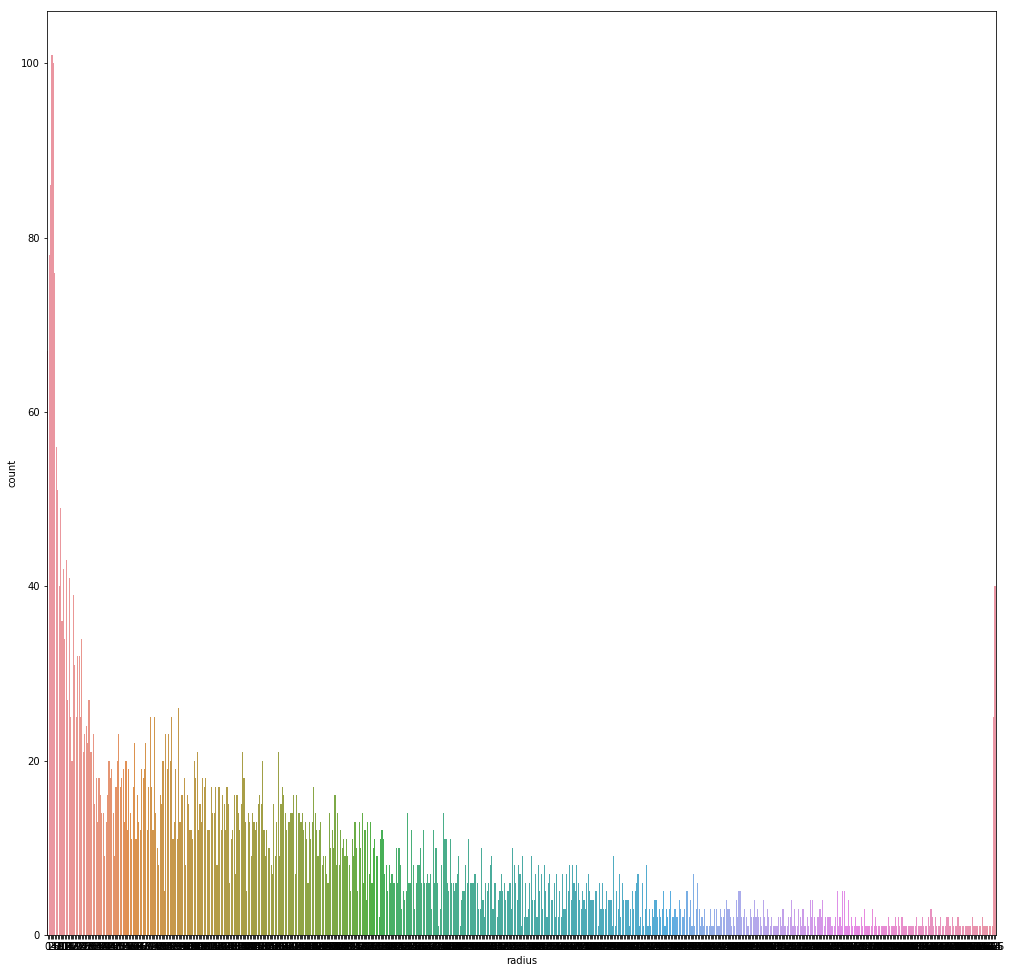

In [12]:
f, ax = plt.subplots(figsize=(17,17))
ax=sns.countplot(x='radius',data=df1,ax=ax)

In [13]:
df1['weight']

0       26
1       31
2       25
3       69
4       24
5       11
6       31
7       13
8       38
9       35
10      22
11      31
12      11
13      24
14      51
15      11
16      47
17      28
18      11
19      14
20      26
21      11
22      11
23      11
24      15
25      11
26      38
27      34
28      20
29      24
        ..
5656    11
5657    12
5658    42
5659    11
5660    12
5661    35
5662    11
5663    11
5664    12
5665    33
5666    12
5667    12
5668    24
5669    27
5670    12
5671    38
5672    11
5673    36
5674    11
5675    11
5676    55
5677    13
5678     6
5679    11
5680    14
5681    11
5682    11
5683    11
5684    38
5685    11
Name: weight, Length: 5686, dtype: int64

In [14]:
df1['radius']

0       212
1        91
2       241
3       283
4       107
5        63
6        10
7       204
8        58
9        81
10      380
11        2
12       57
13       55
14      148
15      261
16      180
17      312
18      295
19       96
20      650
21      259
22      126
23       53
24      112
25      183
26        6
27      411
28      223
29       57
       ... 
5656     23
5657    175
5658    149
5659     37
5660      5
5661    418
5662     12
5663    398
5664     20
5665    175
5666    463
5667     13
5668    365
5669      0
5670    384
5671     29
5672    456
5673    421
5674    459
5675     15
5676     83
5677     25
5678    207
5679     35
5680    536
5681    181
5682      3
5683    162
5684     63
5685    154
Name: radius, Length: 5686, dtype: int64

In [15]:
ctr=0
for i in df1['weight'].values:
    if i==0:
        ctr=ctr+1
ctr

51

In [16]:
ctr=0
for i in df1['radius'].values:
    if i==0:
        ctr=ctr+1
ctr

67

In [17]:
#imputations on weight
xtest=df1.drop('weight',axis=1)
ytest=df1['weight']
xpred=df1.drop('weight',axis=1)
ypred=df1['weight']
ctr=0
c=0
for i in df1['weight']:
    if i==0: 
        xpred=xpred.drop(ctr)
        ypred=ypred.drop(ctr)
    else:
        xtest=xtest.drop(ctr)
        ytest=ytest.drop(ctr)
    ctr=ctr+1
ytest

71      0
263     0
318     0
507     0
710     0
1011    0
1078    0
1205    0
1323    0
1349    0
1360    0
1472    0
1890    0
2361    0
2692    0
2763    0
2844    0
2943    0
3014    0
3296    0
3427    0
3493    0
3882    0
4041    0
4064    0
4076    0
4175    0
4176    0
4239    0
4248    0
4428    0
4469    0
4654    0
4688    0
4713    0
4743    0
4822    0
4945    0
4978    0
4981    0
4996    0
5136    0
5184    0
5313    0
5428    0
5461    0
5479    0
5492    0
5510    0
5628    0
5637    0
Name: weight, dtype: int64

In [18]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
model1=DecisionTreeClassifier().fit(xpred,ypred)
res=model1.predict(xtest)

In [19]:
res

array([14, 15, 11, 13, 11, 14, 12, 15, 23, 11, 30, 38, 10, 21, 26, 11, 13,
       13, 15, 36, 38, 33, 11, 20, 19,  2, 11, 11, 22, 11, 10, 32, 11, 29,
       11, 11, 11, 16, 54, 39, 32, 16, 22, 12, 18, 39, 33, 14, 18, 11, 19], dtype=int64)

In [20]:
res.shape

(51,)

In [21]:
ctr=0
ctr1=0
for i in df1['weight']:
    if i==0: 
        df1['weight'][ctr1]=res[ctr]
        ctr=ctr+1
    ctr1=ctr1+1

In [22]:
df1

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,weight,ring-number,ring-type,spore-print-color,population,habitat
0,1,2,2,2,0,7,1,0,1,0,...,1,6,7,2,26,1,0,7,4,2
1,1,5,3,8,1,6,1,0,1,4,...,2,7,7,2,31,1,4,3,4,5
2,0,2,2,4,1,5,1,0,0,1,...,2,2,2,2,25,2,0,7,1,6
3,1,5,2,2,0,8,1,0,1,0,...,2,6,7,2,69,1,0,7,4,2
4,0,5,2,8,1,3,1,0,0,5,...,2,7,7,2,24,1,4,3,3,3
5,1,5,0,9,0,2,1,0,0,3,...,1,6,4,2,11,1,2,1,5,1
6,0,2,2,3,0,5,1,1,0,7,...,2,7,7,2,31,1,0,3,0,1
7,0,2,0,4,1,5,1,0,0,9,...,2,3,7,2,13,1,4,3,4,0
8,1,5,3,2,0,2,1,0,1,0,...,2,6,6,2,38,1,0,7,4,4
9,1,5,2,3,1,2,1,0,0,3,...,2,7,7,2,35,1,4,1,4,1


In [23]:
#imputations on weight
xtest=df1.drop('radius',axis=1)
ytest=df1['radius']
xpred=df1.drop('radius',axis=1)
ypred=df1['radius']
ctr=0
c=0
for i in df1['radius']:
    if i==0: 
        xpred=xpred.drop(ctr)
        ypred=ypred.drop(ctr)
    else:
        xtest=xtest.drop(ctr)
        ytest=ytest.drop(ctr)
    ctr=ctr+1
ytest

246     0
354     0
387     0
538     0
650     0
690     0
824     0
863     0
977     0
979     0
1071    0
1122    0
1212    0
1217    0
1238    0
1524    0
1547    0
1647    0
1702    0
1751    0
1890    0
1931    0
2038    0
2178    0
2219    0
2265    0
2408    0
2431    0
2461    0
2642    0
       ..
3309    0
3370    0
3405    0
3467    0
3525    0
3576    0
3677    0
3764    0
3800    0
3872    0
3884    0
3949    0
3953    0
3984    0
4183    0
4287    0
4307    0
4364    0
4465    0
4981    0
5106    0
5117    0
5167    0
5267    0
5323    0
5326    0
5389    0
5452    0
5626    0
5669    0
Name: radius, Length: 67, dtype: int64

In [24]:
model2=DecisionTreeClassifier().fit(xpred,ypred)
res=model2.predict(xtest)

In [25]:
res

array([666, 186,  58,  78, 126, 120,   1, 119,  49, 230,  39, 218, 338,
       346, 245,  27,  78,  85,   4,  42, 253,  80, 314, 189, 234,  64,
       358,   1, 395, 452,  96, 172,  75, 361,  83,  24, 174, 228,  37,
        70, 204, 555,  99, 156,  40,  24, 152,  90, 249, 168, 190,  46,
        10,  24,  77, 133,  27,  88,  60,  50, 421,  52,  59,  67, 201,
       501,  42], dtype=int64)

In [26]:
ctr=0
ctr1=0
for i in df1['radius']:
    if i==0: 
        df1['radius'][ctr1]=res[ctr]
        ctr=ctr+1
    ctr1=ctr1+1

In [27]:
df1['radius']

0       212
1        91
2       241
3       283
4       107
5        63
6        10
7       204
8        58
9        81
10      380
11        2
12       57
13       55
14      148
15      261
16      180
17      312
18      295
19       96
20      650
21      259
22      126
23       53
24      112
25      183
26        6
27      411
28      223
29       57
       ... 
5656     23
5657    175
5658    149
5659     37
5660      5
5661    418
5662     12
5663    398
5664     20
5665    175
5666    463
5667     13
5668    365
5669     42
5670    384
5671     29
5672    456
5673    421
5674    459
5675     15
5676     83
5677     25
5678    207
5679     35
5680    536
5681    181
5682      3
5683    162
5684     63
5685    154
Name: radius, Length: 5686, dtype: int64

In [28]:
corr_mat2=df1.corr()
corr_mat2.shape

(24, 24)

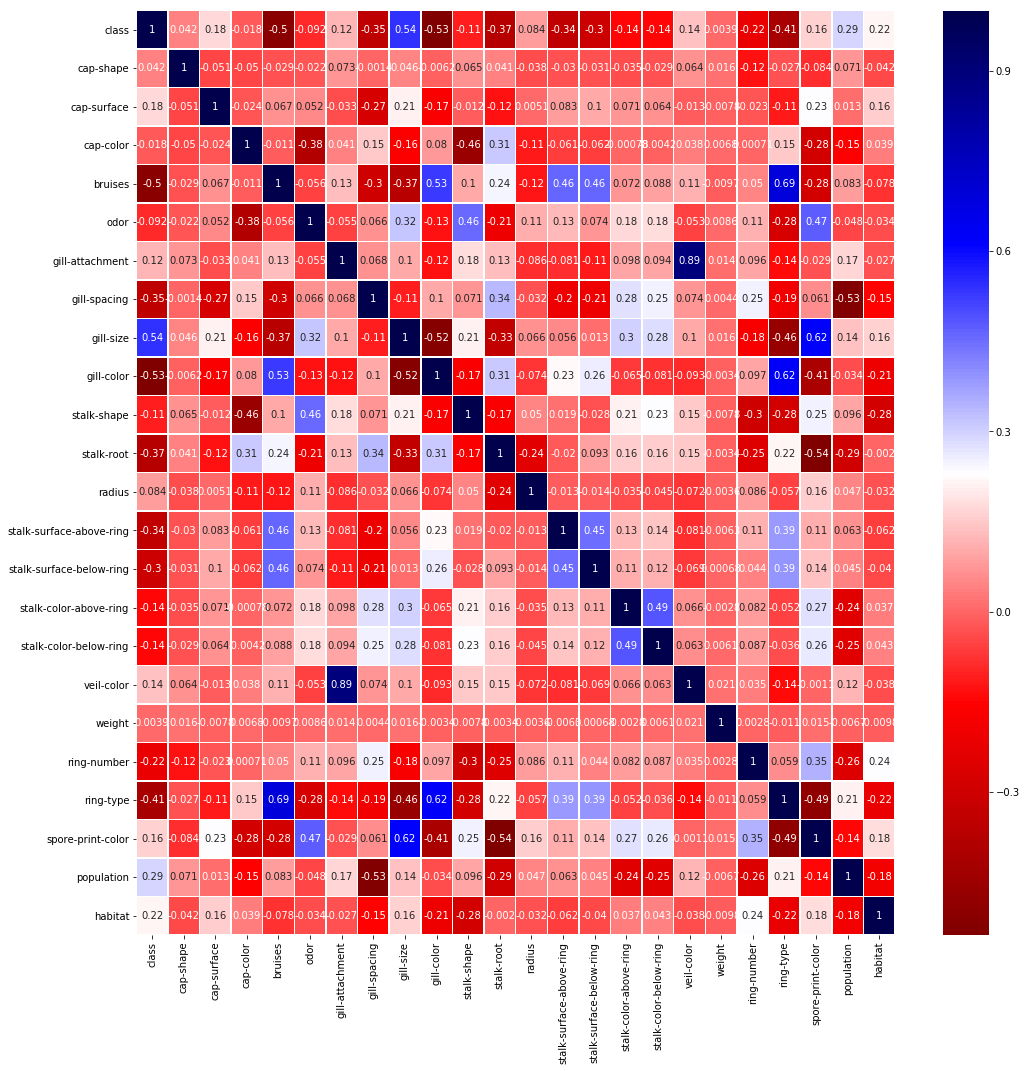

In [29]:
f, ax = plt.subplots(figsize=(17,17))
ax=sns.heatmap(corr_mat2,annot=True,cmap='seismic_r',ax=ax,linewidths=.5)

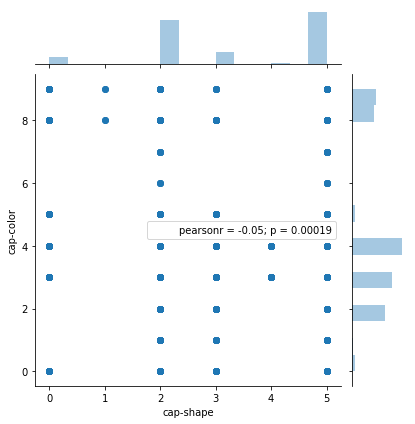

In [30]:

ax=sns.jointplot(x='cap-shape',y='cap-color',data=df1)

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scaler.fit_transform(X)
df2=scaler.fit_transform(df1)
df2=pd.DataFrame(df2)
X.shape

(5686, 23)

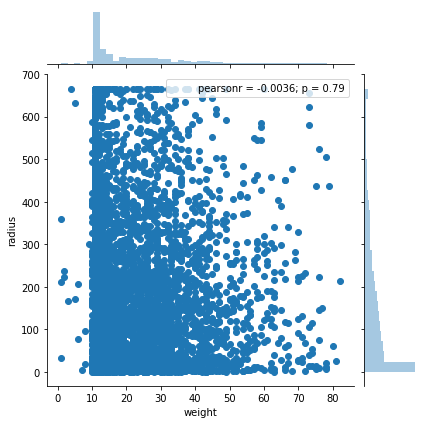

In [32]:
ax=sns.jointplot(x='weight',y='radius',data=df1)

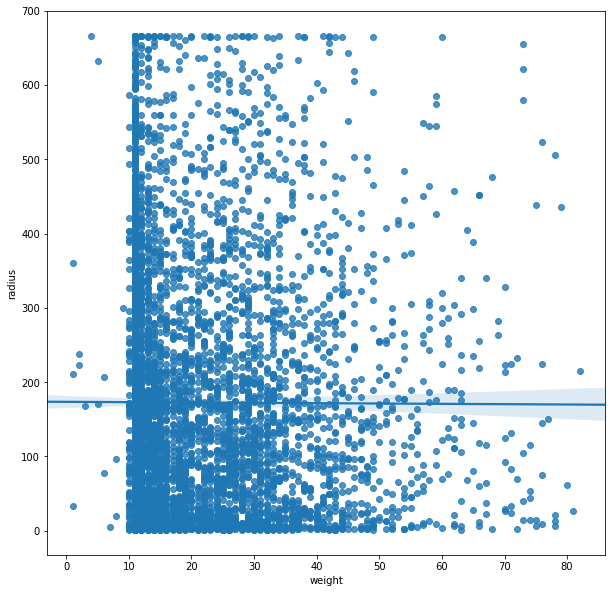

In [33]:
f, ax = plt.subplots(figsize=(10,10))
ax=sns.regplot(x='weight',y='radius',data=df1,ax=ax)

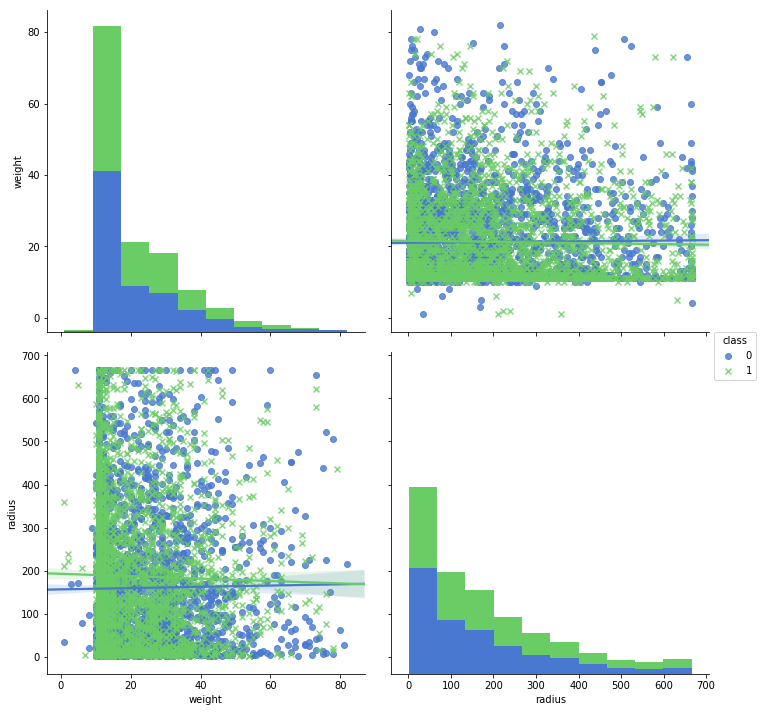

In [34]:
g = sns.pairplot(df1,hue="class",palette="muted",size=5,
    vars=["weight", "radius"],kind='reg',markers=['o','x'])

In [35]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [36]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [37]:
var1= pca.explained_variance_ratio_

In [38]:
varper2=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

In [39]:
varper2

array([ 17.53,  29.36])

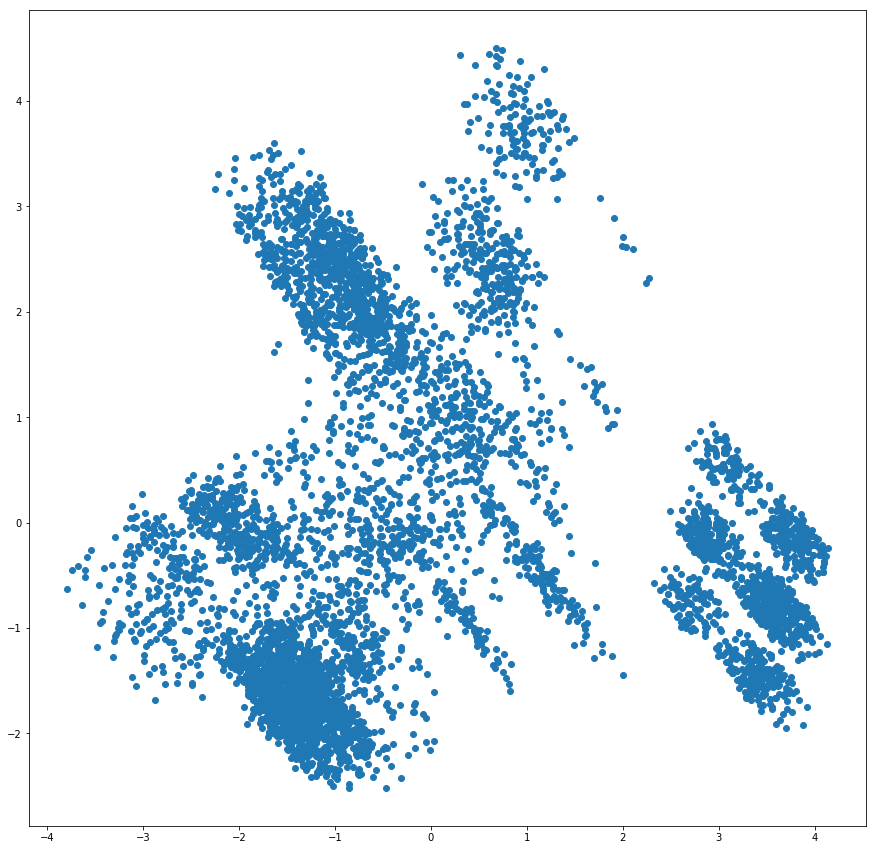

(5686, 2)

In [40]:
proj=(df2.drop(0,axis=1)).values
pca = PCA(n_components=2)
x = pca.fit_transform(proj)
plt.figure(figsize = (15,15))
plt.scatter(x[:,0],x[:,1])
plt.show()
x.shape

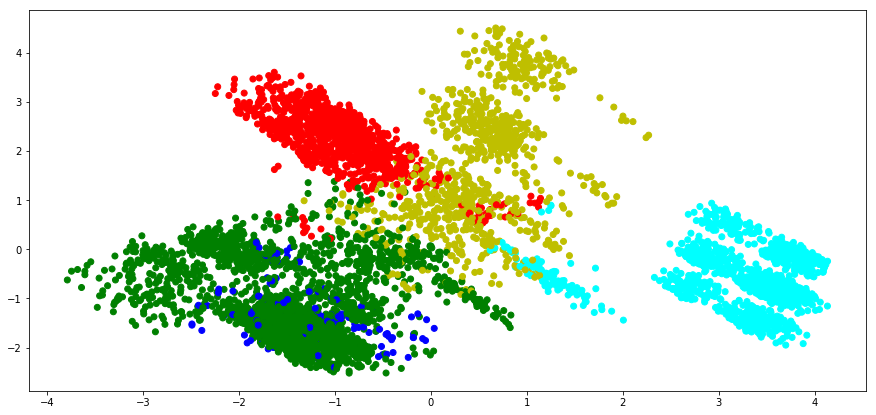

In [41]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=5)
X_clustered = kmeans.fit_predict(proj)

LABEL_COLOR_MAP = {0 : 'g',
                   1 : 'y',
                   2 : 'r',
                   3 : 'b',
                   4 : 'cyan',
                   5 : 'brown'
                  }

label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]
plt.figure(figsize = (15,7))
plt.scatter(x[:,0],x[:,1], c= label_color)
plt.show()

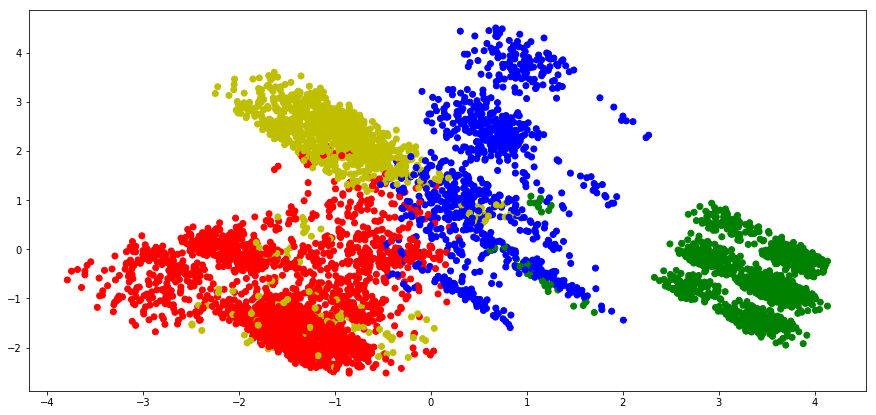

In [42]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=5)
X_clustered = kmeans.fit_predict(proj)

LABEL_COLOR_MAP = {0 : 'g',
                   1 : 'y',
                   2 : 'r',
                   3 : 'b',
                   4 : 'cyan',
                   5 : 'brown'
                  }

label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]
plt.figure(figsize = (15,7))
plt.scatter(x[:,0],x[:,1], c= label_color)
plt.show()

In [43]:
models ={'Logistic Regression':LogisticRegression(),'Decision Tree Classifier':DecisionTreeClassifier(),
         'Random Forest':RandomForestClassifier(),'Support Vector Machines':SVC(),'AdaBoost Classifier':AdaBoostClassifier(),
         'Stochastic Gradient Descent':SGDClassifier()}

F:\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [44]:
pca1=PCA(n_components=22)

In [45]:
pca1.fit(X)#we only fit the model because the model gives us the preffered weights for eacgh of attributes 
#for the train data so that the our principal components have the same orientation in the model while predicting

PCA(copy=True, iterated_power='auto', n_components=22, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [46]:
var11= pca1.explained_variance_ratio_
varper21=np.cumsum(np.round(pca1.explained_variance_ratio_, decimals=4)*100)

In [47]:
varper21

array([ 17.53,  29.36,  40.33,  50.05,  56.91,  63.4 ,  67.99,  72.35,
        76.55,  80.4 ,  83.64,  86.28,  88.77,  91.09,  93.27,  95.31,
        96.94,  97.98,  98.78,  99.38,  99.72, 100.  ])

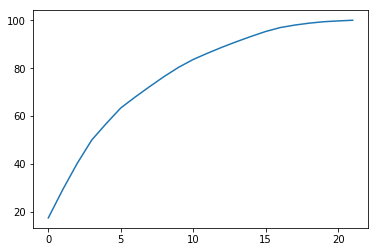

In [48]:
plt.plot(varper21)

In [49]:
#we see that after taking 20 principal components we get a saturation of cumulative variance 
#so we take 20 components to build our model
X1=pca1.fit_transform(X)
print(X1.shape)

(5686, 22)


In [50]:
from sklearn.model_selection import train_test_split # for splitting the data

# Normally data is split into 70,15,15 % for training , validation and testing respectivlely

X_train, X_valid, Y_train, Y_valid = train_test_split(X1, y , test_size=0.30, random_state=42)
X_train.shape

(3980, 22)

In [51]:
scores_precision=[]
scores_acc=[]
scores_recall=[]
scores_f1score=[]
names=[]
from sklearn import metrics
for name,model in models.items():
    model.fit(X_train,Y_train)
    names.append(name)
    precision=metrics.precision_score(Y_valid,model.predict(X_valid))
    scores_precision.append(precision)
    acc=metrics.accuracy_score(Y_valid,model.predict(X_valid))
    scores_acc.append(acc)
    recall=metrics.recall_score(Y_valid,model.predict(X_valid))
    scores_recall.append(recall)
    f1score=metrics.f1_score(Y_valid,model.predict(X_valid))
    scores_f1score.append(f1score)
   
    dataframe = pd.DataFrame({'Models':names,'Precision':scores_precision,'F1-score':scores_f1score,
                              'Accuracy':scores_acc,'Recall':scores_recall})
    
cols = list(dataframe)
# move the column to head of list using index, pop and insert
cols.insert(0, cols.pop(cols.index('Models')))
dataframe = dataframe.ix[:, cols]
dataframe

F:\anaconda3\lib\site-packages\ipykernel_launcher.py:25: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


,Models,Accuracy,F1-score,Precision,Recall
0,Logistic Regression,0.953693,0.951504,0.950920,0.952088
1,Decision Tree Classifier,0.990621,0.990172,0.990172,0.990172
2,Random Forest,0.998828,0.998770,1.000000,0.997543
3,Support Vector Machines,1.000000,1.000000,1.000000,1.000000
4,AdaBoost Classifier,0.990035,0.989513,0.993804,0.985258
5,Stochastic Gradient Descent,0.951934,0.950957,0.926573,0.976658


In [52]:
#random forest classifier and svm are best suited for classification
dframetest=pd.read_csv("C:/Users/Satyabrat Behera/Downloads/mushroom_test.csv")
dframetest

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,weight,ring-number,ring-type,spore-print-color,population,habitat
0,x,f,g,t,n,f,c,b,u,t,...,p,g,p,w,23,o,p,k,y,d
1,x,y,g,f,f,f,c,b,g,e,...,b,b,p,w,23,o,l,h,v,d
2,b,s,w,t,a,f,c,b,w,e,...,w,w,p,w,24,o,p,k,s,m
3,f,y,y,f,f,f,c,b,p,e,...,n,b,p,w,53,o,l,h,y,d
4,b,y,y,t,a,f,c,b,w,e,...,w,w,p,w,24,o,p,k,n,m
5,f,f,y,f,f,f,c,b,h,e,...,n,b,p,w,23,o,l,h,y,d
6,x,f,p,f,c,f,c,n,n,e,...,w,w,p,w,24,o,p,n,s,d
7,k,s,n,f,n,a,c,b,n,e,...,o,o,p,o,24,o,p,b,v,l
8,f,y,n,t,n,f,c,b,p,t,...,p,w,p,w,23,o,p,n,v,d
9,f,s,w,t,f,f,c,b,h,t,...,w,w,p,w,23,o,p,h,v,u


In [53]:

labelencoder=LabelEncoder()
for col in dframetest.columns:
    dframetest[col] = labelencoder.fit_transform(dframetest[col])
dframetest.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,weight,ring-number,ring-type,spore-print-color,population,habitat
0,4,0,3,1,5,1,0,0,9,1,...,6,3,0,2,7,1,4,2,5,0
1,4,2,3,0,2,1,0,0,2,0,...,0,0,0,2,7,1,2,1,4,0
2,0,1,8,1,0,1,0,0,10,0,...,7,7,0,2,8,1,4,2,3,3
3,1,2,9,0,2,1,0,0,7,0,...,4,0,0,2,37,1,2,1,5,0
4,0,2,9,1,0,1,0,0,10,0,...,7,7,0,2,8,1,4,2,2,3


In [54]:
df1.shape

(5686, 24)

In [55]:
X.shape

(5686, 23)

In [56]:
dframetest=dframetest.drop('veil-type',axis=1)

In [57]:
dframetest.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,weight,ring-number,ring-type,spore-print-color,population,habitat
0,4,0,3,1,5,1,0,0,9,1,...,2,6,3,2,7,1,4,2,5,0
1,4,2,3,0,2,1,0,0,2,0,...,1,0,0,2,7,1,2,1,4,0
2,0,1,8,1,0,1,0,0,10,0,...,2,7,7,2,8,1,4,2,3,3
3,1,2,9,0,2,1,0,0,7,0,...,1,4,0,2,37,1,2,1,5,0
4,0,2,9,1,0,1,0,0,10,0,...,2,7,7,2,8,1,4,2,2,3


In [58]:
#imputations on weight
xtest=dframetest.drop('weight',axis=1)
ytest=dframetest['weight']
xpred=dframetest.drop('weight',axis=1)
ypred=dframetest['weight']
ctr=0
c=0
for i in dframetest['weight']:
    if i==0: 
        xpred=xpred.drop(ctr)
        ypred=ypred.drop(ctr)
    else:
        xtest=xtest.drop(ctr)
        ytest=ytest.drop(ctr)
    ctr=ctr+1
ytest

1300    0
1556    0
2345    0
Name: weight, dtype: int64

In [59]:
model3=DecisionTreeClassifier().fit(xpred,ypred)
res=model3.predict(xtest)

In [60]:
ctr=0
ctr1=0
for i in dframetest['weight']:
    if i==0: 
        dframetest['weight'][ctr1]=res[ctr]
        ctr=ctr+1
    ctr1=ctr1+1

In [61]:
dframetest.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,weight,ring-number,ring-type,spore-print-color,population,habitat
0,4,0,3,1,5,1,0,0,9,1,...,2,6,3,2,7,1,4,2,5,0
1,4,2,3,0,2,1,0,0,2,0,...,1,0,0,2,7,1,2,1,4,0
2,0,1,8,1,0,1,0,0,10,0,...,2,7,7,2,8,1,4,2,3,3
3,1,2,9,0,2,1,0,0,7,0,...,1,4,0,2,37,1,2,1,5,0
4,0,2,9,1,0,1,0,0,10,0,...,2,7,7,2,8,1,4,2,2,3


In [62]:
xtest=dframetest.drop('radius',axis=1)
ytest=dframetest['radius']
xpred=dframetest.drop('radius',axis=1)
ypred=dframetest['radius']
ctr=0
c=0
for i in dframetest['radius']:
    if i==0: 
        xpred=xpred.drop(ctr)
        ypred=ypred.drop(ctr)
    else:
        xtest=xtest.drop(ctr)
        ytest=ytest.drop(ctr)
    ctr=ctr+1
ytest

37      0
88      0
112     0
125     0
189     0
197     0
225     0
226     0
372     0
389     0
442     0
465     0
475     0
557     0
617     0
672     0
678     0
740     0
874     0
918     0
992     0
1116    0
1192    0
1209    0
1306    0
1392    0
1435    0
1762    0
1763    0
1771    0
1793    0
1951    0
2058    0
2176    0
2239    0
2317    0
Name: radius, dtype: int64

In [63]:
model4=DecisionTreeClassifier().fit(xpred,ypred)
res=model4.predict(xtest)

In [64]:
ctr=0
ctr1=0
for i in dframetest['radius']:
    if i==0: 
        dframetest['radius'][ctr1]=res[ctr]
        ctr=ctr+1
    ctr1=ctr1+1

In [65]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xsc=scaler.fit_transform(dframetest)

In [66]:
Xsc

array([[ 1.08125726, -1.35458914, -0.58809195, ..., -0.65941073,
         1.08679818, -0.89299906],
       [ 1.08125726,  1.09988007, -0.58809195, ..., -1.07949001,
         0.3000957 , -0.89299906],
       [-1.57878835, -0.12735453,  1.37167865, ..., -0.65941073,
        -0.48660678,  0.86275232],
       ..., 
       [ 1.08125726, -0.12735453, -0.19613783, ...,  1.44098562,
         0.3000957 , -0.89299906],
       [ 1.08125726, -1.35458914,  1.76363277, ..., -1.07949001,
         0.3000957 , -0.89299906],
       [ 1.08125726,  1.09988007, -0.98004607, ..., -0.23933146,
         0.3000957 , -0.89299906]])

In [67]:
dframetest1=scaler.fit_transform(dframetest)
dframetest1=pd.DataFrame(dframetest1)
dframetest1.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,1.081257,-1.354589,-0.588092,1.211450,0.425305,0.179377,-0.439708,-0.669779,1.183522,0.872674,...,0.594911,0.088034,-1.531927,0.163065,-0.809130,-0.239496,0.956509,-0.659411,1.086798,-0.892999
1,1.081257,1.099880,-0.588092,-0.825457,-0.984156,0.179377,-0.439708,-0.669779,-0.787975,-1.145903,...,-0.868654,-3.076001,-3.154359,0.163065,-0.809130,-0.239496,-0.151315,-1.079490,0.300096,-0.892999
2,-1.578788,-0.127355,1.371679,1.211450,-1.923797,0.179377,-0.439708,-0.669779,1.465164,-1.145903,...,0.594911,0.615373,0.631316,0.163065,-0.728964,-0.239496,0.956509,-0.659411,-0.486607,0.862752
3,-0.913777,1.099880,1.763633,-0.825457,-0.984156,0.179377,-0.439708,-0.669779,0.620237,-1.145903,...,-0.868654,-0.966644,-3.154359,0.163065,1.595868,-0.239496,-0.151315,-1.079490,1.086798,-0.892999
4,-1.578788,1.099880,1.763633,1.211450,-1.923797,0.179377,-0.439708,-0.669779,1.465164,-1.145903,...,0.594911,0.615373,0.631316,0.163065,-0.728964,-0.239496,0.956509,-0.659411,-1.273309,0.862752


In [68]:
X4=pca1.fit_transform(Xsc)
X5=pca.fit_transform(Xsc)

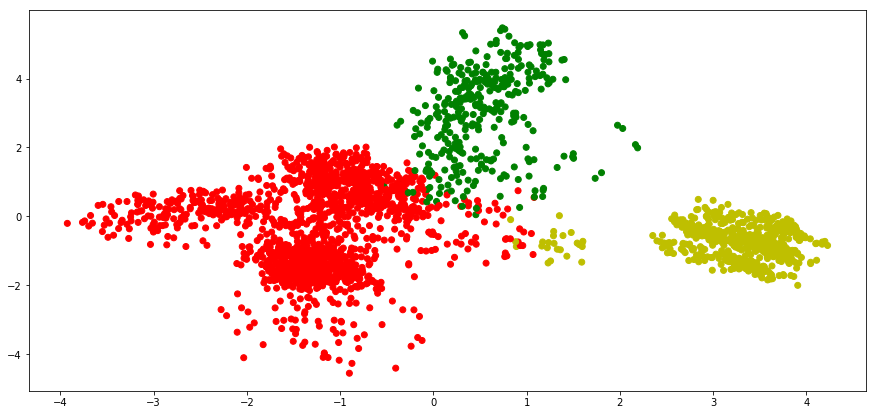

In [69]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=5)
X_clustered1 = kmeans.fit_predict(np.array(dframetest1))

LABEL_COLOR_MAP = {0 : 'g',
                   1 : 'y',
                   2 : 'r',
                   3 : 'b',
                   4 : 'cyan',
                   5 : 'brown'
                  }

label_color = [LABEL_COLOR_MAP[l] for l in X_clustered1]
plt.figure(figsize = (15,7))
plt.scatter(X5[:,0],X5[:,1], c= label_color)
plt.show()

In [70]:
yresult=models['Random Forest'].predict(X4)

In [71]:
yresult=pd.DataFrame(yresult,columns=['class'])

In [72]:
col2=dframetest.columns

In [73]:
col2

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'radius', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'weight', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [74]:
#move class to first column
dframetest.shape

(2438, 23)

In [75]:
#concat them together
dresult=yresult.join(dframetest)
dresult.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,weight,ring-number,ring-type,spore-print-color,population,habitat
0,0,4,0,3,1,5,1,0,0,9,...,2,6,3,2,7,1,4,2,5,0
1,1,4,2,3,0,2,1,0,0,2,...,1,0,0,2,7,1,2,1,4,0
2,0,0,1,8,1,0,1,0,0,10,...,2,7,7,2,8,1,4,2,3,3
3,1,1,2,9,0,2,1,0,0,7,...,1,4,0,2,37,1,2,1,5,0
4,0,0,2,9,1,0,1,0,0,10,...,2,7,7,2,8,1,4,2,2,3


In [76]:
df1.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,weight,ring-number,ring-type,spore-print-color,population,habitat
0,1,2,2,2,0,7,1,0,1,0,...,1,6,7,2,26,1,0,7,4,2
1,1,5,3,8,1,6,1,0,1,4,...,2,7,7,2,31,1,4,3,4,5
2,0,2,2,4,1,5,1,0,0,1,...,2,2,2,2,25,2,0,7,1,6
3,1,5,2,2,0,8,1,0,1,0,...,2,6,7,2,69,1,0,7,4,2
4,0,5,2,8,1,3,1,0,0,5,...,2,7,7,2,24,1,4,3,3,3


In [77]:
#to calculate accuracy of our prediction we need to contactinate and predict the accuracy
combine=df1.append(dresult,ignore_index=True)

In [78]:
combine.shape

(8124, 24)

In [79]:
yfinal=combine['class']
xfinal=combine.drop('class',axis=1)

In [80]:
xfinal.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,weight,ring-number,ring-type,spore-print-color,population,habitat
0,2,2,2,0,7,1,0,1,0,1,...,1,6,7,2,26,1,0,7,4,2
1,5,3,8,1,6,1,0,1,4,0,...,2,7,7,2,31,1,4,3,4,5
2,2,2,4,1,5,1,0,0,1,0,...,2,2,2,2,25,2,0,7,1,6
3,5,2,2,0,8,1,0,1,0,1,...,2,6,7,2,69,1,0,7,4,2
4,5,2,8,1,3,1,0,0,5,0,...,2,7,7,2,24,1,4,3,3,3


In [85]:
dresult.to_csv('finalresult.csv', sep='\t', encoding='utf-8')

In [88]:
#scale all data and use it to train another model using same pca weights and finding the accuracy
scaler = StandardScaler()
xfinal=scaler.fit_transform(xfinal)
xfinal=pca1.fit_transform(xfinal)
X_trainfinal, X_validfinal, Y_trainfinal, Y_validfinal = train_test_split(xfinal, yfinal , test_size=0.30, random_state=42)

In [89]:
scores_precisionf=[]
scores_accf=[]
scores_recallf=[]
scores_f1scoref=[]
namesf=[]
for name,modelfinal in models.items():
    modelfinal.fit(X_trainfinal,Y_trainfinal)
    namesf.append(name)
    precisionf=metrics.precision_score(Y_validfinal,modelfinal.predict(X_validfinal))
    scores_precisionf.append(precisionf)
    accf=metrics.accuracy_score(Y_validfinal,modelfinal.predict(X_validfinal))
    scores_accf.append(accf)
    recallf=metrics.recall_score(Y_validfinal,modelfinal.predict(X_validfinal))
    scores_recallf.append(recallf)
    f1scoref=metrics.f1_score(Y_validfinal,modelfinal.predict(X_validfinal))
    scores_f1scoref.append(f1scoref)
dataframeaccrfinal = pd.DataFrame({'Models':namesf,'Precision':scores_precisionf,'F1-score':scores_f1scoref,
                              'Accuracy':scores_accf,'Recall':scores_recallf})
colsf = list(dataframeaccrfinal)
# move the column to head of list using index, pop and insert
colsf.insert(0, colsf.pop(colsf.index('Models')))
dataframeaccrfinal = dataframeaccrfinal.ix[:, colsf]
dataframeaccrfinal

F:\anaconda3\lib\site-packages\ipykernel_launcher.py:22: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


,Models,Accuracy,F1-score,Precision,Recall
0,Logistic Regression,0.896637,0.885766,0.913084,0.860035
1,Decision Tree Classifier,0.905250,0.897742,0.902939,0.892606
2,Random Forest,0.931091,0.925333,0.934470,0.916373
3,Support Vector Machines,0.939705,0.935441,0.933392,0.937500
4,AdaBoost Classifier,0.914684,0.908127,0.911348,0.904930
5,Stochastic Gradient Descent,0.798605,0.785120,0.780679,0.789613


In [83]:
#so we got a maximum accuracy of 95.406% using random forest classification..
